<a href="https://colab.research.google.com/github/SujayVivek/Image-Caption-Creator/blob/main/ImageAIProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Lets install Inception V3- its like a database that gives a final vector output

In [3]:
inception_v3= tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False
)

87910968/87910968 [==============================] - 0s 0us/step


Learn about the Inception V3 Module here:-
[InceptionV3CloudTPU](https://cloud.google.com/tpu/docs/inception-v3-advanced)

Get a look at its GitHub Code here:- [Code](https://github.com/tensorflow/tpu/tree/master/models/experimental/inception)

Read the Article here:- [Research Paper](https://arxiv.org/pdf/1512.00567.pdf)





In [6]:
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img,channels=3)#loads as a tensor
    img= tf.keras.layers.Resizing(299,299)(img)
    img= img/255 #this is called normalizing
    return img

def get_feature_vector(img_path):
  img=load_img(img_path)
  img= tf.expand_dims(img, axis=0)
  feature_vector=inception_v3(img)
  return img, feature_vector


Input image size is  : (1, 299, 299, 3)
Feature vector size is   : (1, 8, 8, 2048)


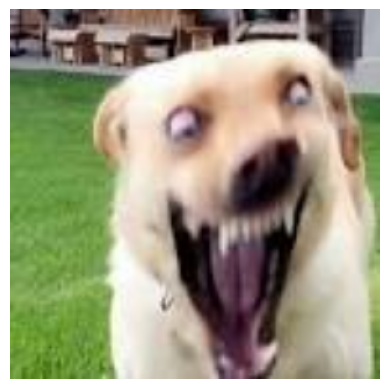

In [11]:
img, feature_vector= get_feature_vector('/content/download.jpg')

#now use matplot lib to display the image
plt.imshow(np.squeeze(img,axis=0))
plt.axis('off')
plt.show

print()
print('Input image size is  :',img.shape)
print('Feature vector size is   :',feature_vector.shape)